In [3]:

print('\u10D1')

ბ


In [33]:
xx=[r'\u10D'+str(x) for x in range(10)]


In [3]:
# after painstaking work, almost all fonts can be divided into one of three keyboard mappings 
# phonetic latin keyboard, unicode, phonetic russian keyboard, these dictionaries give the mappings
# fonts themselves have already been sorted semi-manually

import sh
import os

geodictuc={'AN' : '\u10D0', 'BAN' : '\u10D1', 'GAN' : '\u10D2', 'DON' : '\u10D3', 'EN' : '\u10D4','VIN' : '\u10D5', 
'ZEN' : '\u10D6','TAN' : '\u10D7', 'IN' : '\u10D8', 'KAN' : '\u10D9','LAS' : '\u10DA','MAN' : '\u10DB', 
'NAR' : '\u10DC','ON' : '\u10DD', 'PAR' : '\u10DE', 'ZHAR' : '\u10DF', 'RAE' : '\u10E0', 'SAN' : '\u10E1',
'TAR' : '\u10E2', 'UN' : '\u10E3','PHAR' : '\u10E4', 'KHAR' : '\u10E5', 'GHAN' : '\u10E6','QAR' : '\u10E7', 
'SHIN' : '\u10E8', 'CHIN' : '\u10E9', 'CAN' : '\u10EA', 'JIL' : '\u10EB', 'CIL' : '\u10EC', 'CHAR' : '\u10ED',
'XAN' : '\u10EE', 'JHAN' : '\u10EF', 'HAE' : '\u10F0' }

geodictrk={'AN' : 'f', 'BAN' : ',', 'GAN' : 'u', 'DON' : 'l', 'EN' : 't','VIN' : 'd', 
'ZEN' : 'p','TAN' : 's', 'IN' : 'b', 'KAN' : 'r','LAS' : 'k','MAN' : 'v', 
'NAR' : 'y','ON' : 'j', 'PAR' : 'g', 'ZHAR' : ';', 'RAE' : 'h', 'SAN' : 'c',
'TAR' : 'n', 'UN' : 'e','PHAR' : 'a', 'KHAR' : 'm', 'GHAN' : 'q','QAR' : '.', 
'SHIN' : 'i', 'CHIN' : 'x', 'CAN' : 'w', 'JIL' : '\u10EB', 'CIL' : 'o', 'CHAR' : 'z',
'XAN' : '[', 'JHAN' : ']', 'HAE' : '/' }

geodictla={'AN' : 'a','BAN' : 'b','GAN' : 'g', 'DON' : 'd',  'EN' : 'e','VIN' : 'v', 'ZEN' : 'z', 'TAN' : 'T', 
           'IN' : 'i', 'KAN' : 'k','LAS' : 'l', 'MAN' : 'm',  'NAR' : 'n', 'ON' : 'o', 'PAR' : 'p', 'ZHAR' : 'J', 
           'RAE' : 'r', 'SAN' : 's', 'TAR' : 't', 'UN' : 'u', 'PHAR' : 'f', 'KHAR' : 'q', 'GHAN' : 'R', 'QAR' : 'y', 
            'SHIN' : 'S','CHIN' : 'C','CAN' : 'c', 'JIL' : 'Z', 'CIL' : 'w', 'CHAR' : 'W','XAN' : 'x', 
           'JHAN' : 'j', 'HAE' : 'h' }

letters=list(geodictuc.keys())


for x in letters:
    if os.path.isdir('letters/'+x)==False:
        sh.mkdir('letters/'+x)

(20398,)

In [8]:
# produces lists of filenames for each font in each directory 

import os
import PIL
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw

rkgeofonts=[]
ucgeofonts=[]
lageofonts=[]

for root, dirs, files in os.walk("/home/greg/repos/geoalpha/russiankeyboard/", topdown=False):
   for name in files:
      rkgeofonts.append(os.path.join(root, name))
        
for root, dirs, files in os.walk("/home/greg/repos/geoalpha/needslatin/", topdown=False):
   for name in files:
      lageofonts.append(os.path.join(root, name))
        
for root, dirs, files in os.walk("/home/greg/repos/geoalpha/needsunicode/", topdown=False):
   for name in files:
      ucgeofonts.append(os.path.join(root, name))

In [6]:
laextractor('IN')

In [11]:
# creates functions which save an image of each letter from each font in the named directory
# directory to its correcsponding letter directory

# font = ImageFont.truetype("Arial-Bold.ttf",14)

def rkextractor(LETTER):    
    for x in rkgeofonts:
        font = ImageFont.truetype(x,36)
        img=Image.new("L", (150,150),color=256)
        draw = ImageDraw.Draw(img)
        draw.text((0, 0),geodictrk.get(LETTER),font=font)
       # draw = ImageDraw.Draw(img)
        img.save("letters/"+LETTER+"/"+x.split("/")[-1].split('.')[0]+".bmp")
        #img.show()

def ucextractor(LETTER): 
    for x in ucgeofonts:
        font = ImageFont.truetype(x,36)
        img=Image.new("L", (150,150),color=256)
        draw = ImageDraw.Draw(img)
        draw.text((0, 0),geodictuc.get(LETTER),font=font)
       # draw = ImageDraw.Draw(img)
        img.save("letters/"+LETTER+"/"+x.split("/")[-1].split('.')[0]+".bmp")
        #img.show()



def laextractor(LETTER):  
    for x in lageofonts:
        font = ImageFont.truetype(x,36)
        img=Image.new("L", (150,150),color=256)
        draw = ImageDraw.Draw(img)
        draw.text((0, 0),geodictla.get(LETTER),font=font)
       # draw = ImageDraw.Draw(img)
        img.save("letters/"+LETTER+"/"+x.split("/")[-1].split('.')[0]+".bmp")
        #img.show()

In [12]:
# actually apply above functions
for x in letters:
    ucextractor(x)
    rkextractor(x)
    laextractor(x)

In [104]:
# junk

xx=np.array([[img.getpixel((i,j)) for i in range(28) ]for j in range(28)],dtype=np.uint8)
type(xx[0,0])

numpy.uint8

In [103]:
# junk
type(np.array(img)[0,0])

numpy.uint8

In [246]:
# getting pixels
import numpy as np

for i in range(28):
    for j in range(28):
       # print(img.getpixel((i,j)))

SyntaxError: unexpected EOF while parsing (<ipython-input-246-2a7b7802671a>, line 5)

In [8]:
# redundant

for x in geofonts:
    font = ImageFont.truetype(x,36)
    img=Image.new("RGBA", (50,50),(255,255,255))
    draw = ImageDraw.Draw(img)
    draw.text((0, 0),'\u10D1',(0,0,0),font=font)
    draw = ImageDraw.Draw(img)
    img.save("letters/ban/"+x.split("/")[-1].split('.')[0]+".png")

In [244]:
#list(img.getdata())

In [117]:
len(geofonts)

285

In [147]:
1/0.4166666666666667

2.4

In [245]:
# get pixel from loaded image, not needed in program but useful to have around
im = Image.open("/home/greg/repos/geoalpha/banhandwritten")
im.show()
for i in range(28):
    for j in range(28):
        #print(im.getpixel((i,j)))

SyntaxError: unexpected EOF while parsing (<ipython-input-245-fa4c9fb05c00>, line 5)

In [105]:
# junk 
imp= Image.fromarray(xx)
imp.show()

In [11]:
# croping
import numpy as np

def crop_resize(path):
    image=Image.open(path)
    image.load()

    image_data = np.asarray(image)
    #image_data_bw = image_data.max(axis=2)
    non_empty_columns = np.where(image_data.min(axis=0)<255)
    if len(non_empty_columns[0])!=0:
        non_empty_rows = np.where(image_data.min(axis=1)<255)
        cropBox = (np.min(non_empty_rows), np.max(non_empty_rows), np.min(non_empty_columns), np.max(non_empty_columns))
        image_data_new = image_data[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1]
        new_image = Image.fromarray(image_data_new)
        new_image=new_image.resize((28,28), resample=0)
        new_image.save(path)

    #new_image.show()

In [22]:
#list(os.walk("/home/greg/repos/geoalpha/letters/"))

In [80]:
# constructs a list of the paths to all letters

crstarget=[]
for root, dirs, files in os.walk("/home/greg/repos/geoalpha/letters/", topdown=False):
    for name in files:
       crstarget.append(os.path.join(root, name))



In [81]:
# applies cropping to everything created
# at this stage the user will still need 
# to manually inspect asch directory for misplaced letters and/ or rubbish
# but, we have minimised this tho the greatest extent that we belive is practical

for x in crstarget:
    crop_resize(x)
    


In [9]:
# test set needs to be stratified for each letter
# this method does this

def construct_tran_test(letter):
    images=[]
    targets=[]
    counter=0
    for root, dirs, files in os.walk( "/home/greg/repos/geoalpha/letters/"+letter, topdown=False):
            for f in files:
                image=Image.open(os.path.join(root, f))
                image.load()
                image_data = np.asarray(image)
                if image_data.shape!=(28, 28): print('error with'+ root+ f)
                images.append(image_data)
                targets.append(root.split("/")[-1])
                counter+=1
    perm = np.random.permutation(len(images))
    images=np.array(images)
    images=list(images[perm])
    targets=np.array(targets)
    targets=list(targets[perm])
    testnum=int(counter/10)
    return (images[testnum:],targets[testnum:],images[:testnum],targets[:testnum])

In [12]:
# constructs train and test set, turns each elt into np array randomply permutes them

X_train, X_test, y_train, y_test =[], [], [], []
for l in letters:
    ctt=construct_tran_test(l)
    X_train+=ctt[0]
    y_train+=ctt[1]
    X_test+=ctt[2]
    y_test+=ctt[3]

ptr=np.random.permutation(len(X_train))
pte=np.random.permutation(len(X_test))

X_train=np.asarray(X_train)
y_train=np.asarray(y_train)
X_test=np.asarray(X_test)
y_test=np.asarray(y_test)

X_train=X_train[ptr]
y_train=y_train[ptr]
X_test=X_test[pte]
y_test=y_test[pte]

In [13]:
X_train.shape

(20396, 28, 28)

In [316]:
# just quickly check manually that we're not producing crap
pick=129
print(y_train[pick])
imp= Image.fromarray(X_train[pick])
imp.show()

HAE


In [56]:
samp=Image.fromarray(X_train[124])
samp.show()

In [291]:
# keep the same order as MNIST 
geoNIST = [X_train, X_test, y_train, y_test]

In [292]:
# pickles everything we've constructed

# keep the same order as MNIST 
geoNIST = [X_train, X_test, y_train, y_test]

import pickle
pickling_on = open("geoNIST.pickle","wb")
pickle.dump(geoNIST, pickling_on)
pickling_on.close()

In [266]:
len(letters)

33

In [95]:
def non_overflowing_sum(a, b):
    c = np.uint16(a)+b
    c[np.where(c>255)] = 255
    c[np.where(c<0)] = 0
    return np.uint8( c )
def non_overflowing_subtract(a, b):
    c = np.uint16(a)+b
    c[np.where(c>255)] = 255
    c[np.where(c<0)] = 0
    return np.uint8( c )

In [102]:
rc=Image.fromarray(non_overflowing_subtract(X_train[124],np.random.normal(0,25, size=(28, 28))).astype(np.uint8))
rc.show()

In [69]:
xx=np.random.normal(100,25, size=(8, 8)).astype(np.uint8)

In [86]:
#to do, algoritm to roughen up the edge of these

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:499: UserWarning: The default of `mode` in `skimage.transform.swirl` will change to `reflect` in version 0.15.
  warn('The default of `mode` in `skimage.transform.swirl` '


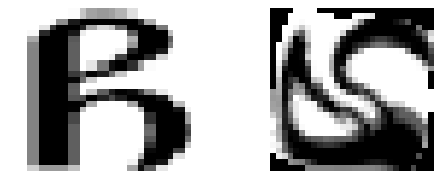

In [121]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import swirl


image = X_train[125]
swirled = swirl(image, rotation=0, strength=3, radius=150)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),
                               sharex=True, sharey=True)

ax0.imshow(image, cmap=plt.cm.gray, interpolation='none')
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray, interpolation='none')
ax1.axis('off')

plt.show()


In [148]:
np.arange(0.0, 28, 1).shape

#np.sin(np.array([range(28)]))

(28,)

In [159]:
import matplotlib.pyplot as plt
t = np.arange(0.0, 28, 1)
s = 1 + np.cos((2/28)* np.pi * t+np.pi)

fig, ax = plt.subplots()
ax.plot(t,s)

In [353]:
xx=(0.5+np.array(4*s)).astype(int)


In [346]:
print(permatrix(2))

[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 

In [303]:
gp[:,0].shape

(28,)

In [216]:
def pmatrixcol(n,s):
    multarr=[ [0]*abs(n+s)+[1]+[0]*abs(27-n-s)

pmatrix=[]
for n in range(28):
    pmatrix.append(pmatrixcol(n,xx[n]))

In [288]:
def permatrix(s):
    multar = [[0]*28 for n in range(28)]
    for n in range(28):
        tp = (n+s)%28
        multar[n][tp]=1
    return np.array(multar)

In [339]:
gp=X_train[129].copy()
for n in range(28):
    gp[:,n]=np.matmul(2*permatrix(xx[n]),gp[:,n])

In [354]:
#do the same for rows INCOMPLETE

gp=X_train[129].copy()
for n in range(28):
    gp[n,:]=np.matmul(permatrix(xx[n]),gp[n,:].T)

In [355]:
imp= Image.fromarray(gp)
imp.show()